In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import numpy as np
import seaborn as sns
import os

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.feature_selection import RFECV, SelectFromModel, SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
%matplotlib inline

In [3]:
df_Stock = pd.read_csv('./Downloads/AAPL.csv', index_col=0)
df_Stock.reset_index(inplace=True)
df_Stock['Date'] = pd.to_datetime(df_Stock['Date'])
df_Stock['time'] = pd.Series(range(1, len(df_Stock) + 1), index=df_Stock.index)
df_Stock = df_Stock[["time",'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]
# Re-inspect data
print(df_Stock)

        time       Date        Open        High         Low       Close  \
0          1 1980-12-12    0.128348    0.128906    0.128348    0.128348   
1          2 1980-12-15    0.122210    0.122210    0.121652    0.121652   
2          3 1980-12-16    0.113281    0.113281    0.112723    0.112723   
3          4 1980-12-17    0.115513    0.116071    0.115513    0.115513   
4          5 1980-12-18    0.118862    0.119420    0.118862    0.118862   
...      ...        ...         ...         ...         ...         ...   
10463  10464 2022-06-13  132.869995  135.199997  131.440002  131.880005   
10464  10465 2022-06-14  133.130005  133.889999  131.479996  132.759995   
10465  10466 2022-06-15  134.289993  137.339996  132.160004  135.429993   
10466  10467 2022-06-16  132.080002  132.389999  129.039993  130.059998   
10467  10468 2022-06-17  130.070007  133.080002  129.809998  131.559998   

        Adj Close     Volume  
0        0.100178  469033600  
1        0.094952  175884800  
2     

In [4]:
tr = df_Stock['Close']
t = np.log(tr)
t = t-t.shift(1)
t.dropna(inplace=True)
t[0] += np.log(tr[0])
print(np.allclose(tr[1:],np.exp(t.cumsum())))

KeyError: 0

In [7]:
# Load the time series data
df_Stock = pd.read_csv('./Downloads/AAPL.csv', parse_dates=['Date'])

# Make the time series stationary using log differencing
tr = np.log(df_Stock['Close'])
t = tr - tr.shift(1)
t.dropna(inplace=True)
t += np.log(df['Close'].iloc[0])

# Check if the time series is now stationary using a statistical test
from statsmodels.tsa.stattools import adfuller
result = adfuller(t)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -26.07665767449872
p-value: 0.0
Critical Values: {'1%': -3.430975744435258, '5%': -2.8618165431376283, '10%': -2.566917198768457}


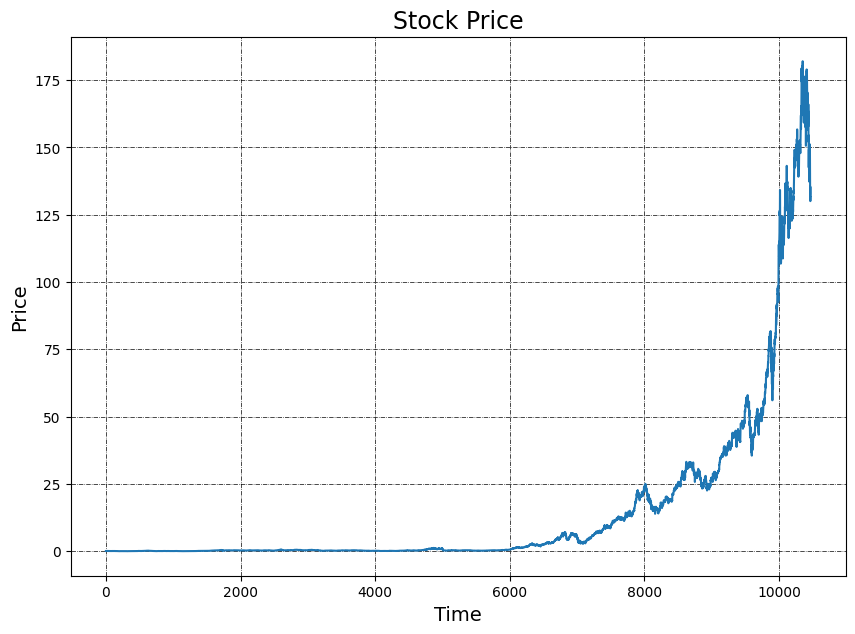

In [8]:
df_Stock['Close'].plot(figsize=(10, 7))
plt.title("Stock Price", fontsize=17)
plt.ylabel('Price', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

In [13]:
def create_train_test_set(df_Stock):
    
    features = df_Stock[['Open', 'High', 'Low', 'Adj Close', 'Volume']]
    target = df_Stock['Close']
    

    data_len = df_Stock.shape[0]
    print('Historical Stock Data length is - ', str(data_len))

    #create a chronological split for train and testing
    train_split = int(data_len * 0.88)
    print('Training Set length - ', str(train_split))

    val_split = train_split + int(data_len * 0.1)
    print('Validation Set length - ', str(int(data_len * 0.1)))

    print('Test Set length - ', str(int(data_len * 0.02)))

    # Splitting features and target into train, validation and test samples 
    X_train, X_val, X_test = features[:train_split], features[train_split:val_split], features[val_split:]
    Y_train, Y_val, Y_test = target[:train_split], target[train_split:val_split], target[val_split:]

    #print shape of samples
    print(X_train.shape, X_val.shape, X_test.shape)
    print(Y_train.shape, Y_val.shape, Y_test.shape)
    
    return X_train, X_val, X_test, Y_train, Y_val, Y_test

In [10]:
print(df_Stock.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [11]:
print(df_Stock.index)

RangeIndex(start=0, stop=10468, step=1)


In [14]:
X_train, X_val, X_test, Y_train, Y_val, Y_test = create_train_test_set(df_Stock)

Historical Stock Data length is -  10468
Training Set length -  9211
Validation Set length -  1046
Test Set length -  209
(9211, 5) (1046, 5) (211, 5)
(9211,) (1046,) (211,)


In [ ]:
X_train = X_train.values.reshape(-1, 1)
X_val = X_val.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

In [ ]:
X_train['Date'] = X_train['Date'].astype(int) // 10**9


In [15]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [16]:
print('LR Coefficients: \n', lr.coef_)
print('LR Intercept: \n', lr.intercept_)

LR Coefficients: 
 [-5.77522070e-01  8.25412819e-01  7.22404953e-01  3.22183645e-02
  9.28512822e-12]
LR Intercept: 
 -0.0008452175029409759


In [17]:

print(f"Linear Regression Equation: y = {lr.intercept_:.3f} + {lr.coef_[0]:.3f}*x1 + {lr.coef_[1]:.3f}*x2 + {lr.coef_[2]:.3f}*x3 + {lr.coef_[3]:.3f}*x4 + {lr.coef_[4]:.3f}*x5 + {lr.coef_[5]:.3f}*x6")


IndexError: index 5 is out of bounds for axis 0 with size 5

In [18]:
print("Performance (R^2): ", lr.score(X_train, Y_train))

Performance (R^2):  0.999963747718585


In [19]:
def get_mape(y_true, y_pred): 
    """
    Compute mean absolute percentage error (MAPE)
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [20]:
Y_train_pred = lr.predict(X_train)
Y_val_pred = lr.predict(X_val)
Y_test_pred = lr.predict(X_test)

In [21]:
print("Training R-squared: ",round(metrics.r2_score(Y_train,Y_train_pred),2))
print("Training Explained Variation: ",round(metrics.explained_variance_score(Y_train,Y_train_pred),2))
print('Training MAPE:', round(get_mape(Y_train,Y_train_pred), 2)) 
print('Training Mean Squared Error:', round(metrics.mean_squared_error(Y_train,Y_train_pred), 2)) 
print("Training RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_train,Y_train_pred)),2))
print("Training MAE: ",round(metrics.mean_absolute_error(Y_train,Y_train_pred),2))

print(' ')

print("Validation R-squared: ",round(metrics.r2_score(Y_val,Y_val_pred),2))
print("Validation Explained Variation: ",round(metrics.explained_variance_score(Y_val,Y_val_pred),2))
print('Validation MAPE:', round(get_mape(Y_val,Y_val_pred), 2)) 
print('Validation Mean Squared Error:', round(metrics.mean_squared_error(Y_train,Y_train_pred), 2)) 
print("Validation RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_val,Y_val_pred)),2))
print("Validation MAE: ",round(metrics.mean_absolute_error(Y_val,Y_val_pred),2))

print(' ')

print("Test R-squared: ",round(metrics.r2_score(Y_test,Y_test_pred),2))
print("Test Explained Variation: ",round(metrics.explained_variance_score(Y_test,Y_test_pred),2))
print('Test MAPE:', round(get_mape(Y_test,Y_test_pred), 2)) 
print('Test Mean Squared Error:', round(metrics.mean_squared_error(Y_test,Y_test_pred), 2)) 
print("Test RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_test,Y_test_pred)),2))
print("Test MAE: ",round(metrics.mean_absolute_error(Y_test,Y_test_pred),2))

Training R-squared:  1.0
Training Explained Variation:  1.0
Training MAPE: 0.85
Training Mean Squared Error: 0.0
Training RMSE:  0.05
Training MAE:  0.02
 
Validation R-squared:  1.0
Validation Explained Variation:  1.0
Validation MAPE: 0.51
Validation Mean Squared Error: 0.0
Validation RMSE:  0.62
Validation MAE:  0.38
 
Test R-squared:  0.99
Test Explained Variation:  0.99
Test MAPE: 0.62
Test Mean Squared Error: 1.63
Test RMSE:  1.28
Test MAE:  0.98


In [22]:
df_pred = pd.DataFrame(Y_test.values, columns=['Actual'], index=Y_test.index)
df_pred['Predicted'] = Y_test_pred 
df_pred['Date'] = df_Stock['Date']
df_pred.set_index('Date', inplace=True)
#df_pred.loc[:, 'time'] = pd.to_datetime(df_pred['time'],format='%Y-%m-%d')
df_pred

,Actual,Predicted
Date,,
2021-08-18,146.360001,148.168567
2021-08-19,146.699997,147.497175
2021-08-20,148.190002,148.212693
2021-08-23,149.710007,149.955834
2021-08-24,149.619995,150.757716
...,...,...
2022-06-13,131.880005,134.062612
2022-06-14,132.759995,132.888058
2022-06-15,135.429993,135.643138


In [53]:
print(df_pred.columns)

Index(['Actual', 'Predicted'], dtype='object')


<AxesSubplot:xlabel='Date'>

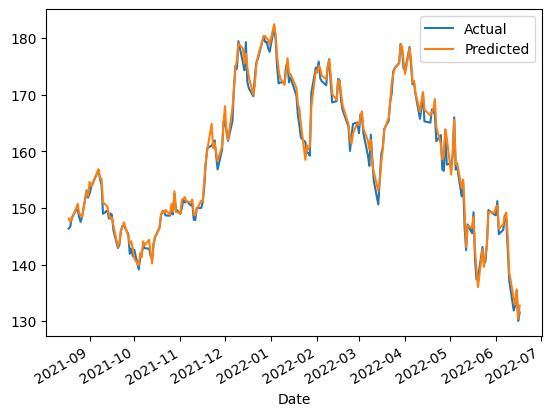

In [57]:
df_pred[['Actual','Predicted']].plot()

<AxesSubplot:xlabel='Actual', ylabel='Predicted'>

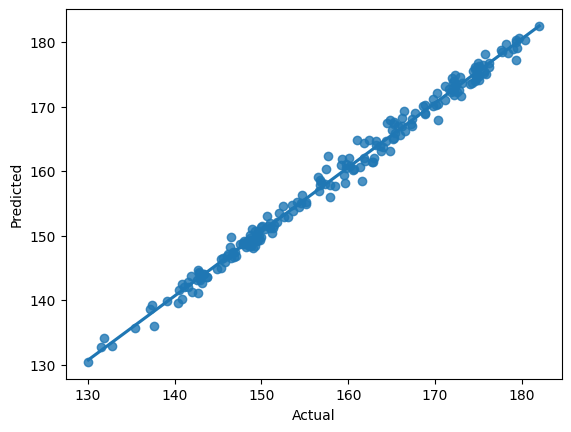

In [58]:
sns.regplot(x=df_pred['Actual'],y=df_pred['Predicted'],ci=None)

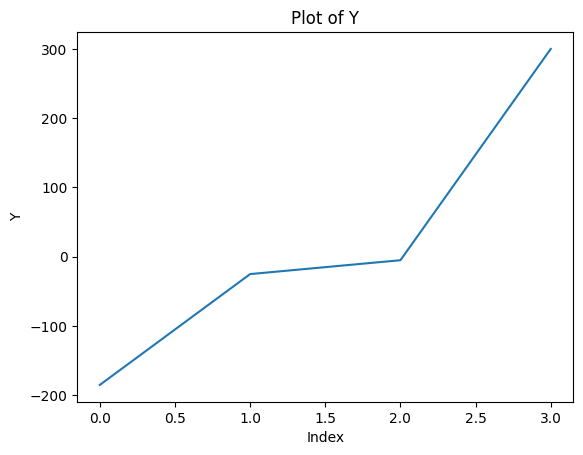

In [72]:
import matplotlib.pyplot as plt

x1 = [50, 90, 130,145]
x2 = [170, 150, 200, 70]
y = [5 + 3 * x1[i] - 2 * x2[i] for i in range(len(x1))]

plt.plot(range(len(y)), y)
plt.xlabel('Index')
plt.ylabel('Y')
plt.title('Plot of Y')
plt.show()

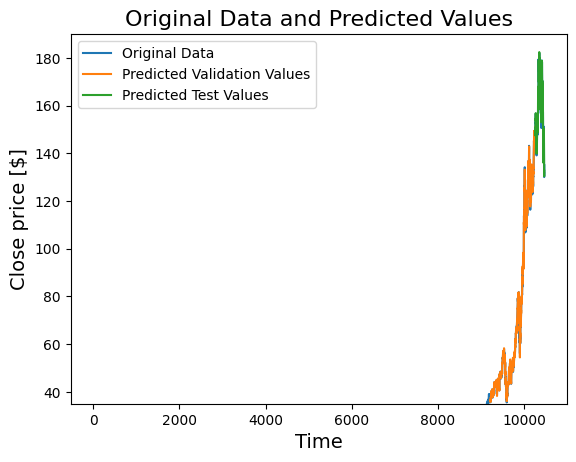

In [75]:
import matplotlib.pyplot as plt

plt.plot(df_Stock.index, df_Stock['Close'], label='Original Data')
plt.plot(Y_val.index, Y_val_pred, label='Predicted Validation Values')
plt.plot(Y_test.index, Y_test_pred, label='Predicted Test Values')
plt.xlabel('Time', fontdict={'fontsize':14})
plt.ylabel('Close price [$]', fontdict={'fontsize':14})
# plt.xlim(0, 305) to be defined
plt.ylim(35, 190)
plt.title(f'Original Data and Predicted Values', fontdict={'fontsize':16})
plt.legend()
# plt.savefig('ARIMA_predictions.png', dpi=900)
plt.show()